# 0.0 IMPORTS

## 0.1 Libraries

In [13]:
import warnings

import numpy             as np
import pandas            as pd
import scipy.stats       as ss

import seaborn           as sns
import matplotlib.pyplot as plt

from IPython.display         import Image
from IPython.core.display    import HTML

from sklearn.model_selection import StratifiedShuffleSplit

# costomized packages
import sys
sys.path.append('../')

from src.data.make_dataset   import Dataset

## 0.2 Helper Functions

### 0.2.1 Notebook Config

In [2]:
def jupyter_settings():
    %matplotlib inline
    
    plt.style.use('seaborn-bright')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width:85% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    warnings.filterwarnings("ignore")
    
    sns.set()

In [3]:
jupyter_settings()

### 0.2.2 Functions

In [4]:
#========================================== Statistical Summary ==========================================#
def statistical_summary(num_attributes):
    ### Central Tendency -> Mean, Median, Mode
    ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
    ct3 = pd.DataFrame(ss.mode(num_attributes)[0])
    ct3.columns = ct1.columns

    ### Dispersion -> std, min, max, range, skew, kurtosis, rsd
    d1 = pd.DataFrame(num_attributes.apply(np.std)).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
    d7 = d1 / ct1
    
    # Quantile
    q05 = pd.DataFrame(num_attributes.quantile(0.05)).T
    q25 = pd.DataFrame(num_attributes.quantile(0.25)).T
    q75 = pd.DataFrame(num_attributes.quantile(0.75)).T
    q95 = pd.DataFrame(num_attributes.quantile(0.95)).T
    iqr = pd.DataFrame(q75.reset_index(drop=True) - q25.reset_index(drop=True))

    # Calculates the outliers boundaries through statistical relationship
    low_outliers = q25.reset_index(drop=True) - 1.5 * iqr.reset_index(drop=True)
    high_outliers = q75.reset_index(drop=True) + 1.5 * iqr.reset_index(drop=True)


    # Concatenate
    m = pd.concat([d2, d3, d4, ct3, ct1, ct2, q05, q25, q75, q95, iqr, low_outliers, high_outliers, d1, d7, d5, d6]).T.reset_index()
    m.columns = ['Attributes', 'Min', 'Max', 'Range', 'Mode', 'Mean', 'Median', '5%', '25%', '75%', '95%','IQR', 'Low Outliers', 'High Outliers', 'Std','Relative Std', 'Skew', 'Kurtosis']
    
    return m

## 0.3 Loading data

In [9]:
dataset = Dataset()

### 0.3.1 Saving Test Dataset

In [10]:
#dataset.get_test_data('../zip')

### 0.3.2 Query Train Dataset

In [11]:
df_raw = dataset.get_train_data("../query/raw_data.sql")

### 0.3.3 Saving the Data

In [14]:
#Apply stratified sampling in order to keep target variable proportion in the train and test datasets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, test_index in split.split(df_raw, df_raw['response']):
    train_dataset = df_raw.loc[train_index].reset_index(drop=True)
    test_dataset = df_raw.loc[test_index].reset_index(drop=True)
    
# Convert to .Feather Data
# train_dataset.to_feather('../data/interim/training_data.feather')
# test_dataset.to_feather('../data/interim/test_data.feather')

### 0.3.4 Read Training Dataset

In [15]:
df_train = pd.read_feather('../data/interim/training_data.feather')

# 1.0 Data Description

In [16]:
df01 = df_train.copy()
df01.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,217244,Female,41,47.0,152.0,1,1-2 Year,No,1,2630.0,34,0
1,62034,Female,23,36.0,152.0,1,< 1 Year,No,1,34188.0,30,0
2,290598,Male,71,28.0,26.0,1,1-2 Year,Yes,0,52749.0,91,0
3,213946,Male,43,26.0,124.0,1,1-2 Year,Yes,0,25326.0,230,0
4,209186,Male,58,8.0,124.0,1,1-2 Year,No,1,2630.0,116,0


## 1.1 Data Dimensions

In [17]:
print(f'Number of Rows: {df01.shape[0]}')
print(f'Number of Columns: {df01.shape[1]}')

Number of Rows: 323942
Number of Columns: 12


## 1.2 Data Type

In [18]:
df01.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

## 1.3 NA Check

In [19]:
df01.isnull().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

## 1.4 ~~Change Data type~~

## 1.5 Check Balanced Data

In [20]:
df01['response'].value_counts(normalize=True)

0    0.877438
1    0.122562
Name: response, dtype: float64

## 1.6 Descriptive Analysis

In [21]:
# numerical
num_attributes = df01.select_dtypes(include=['int64', 'float64'])
# categorical
cat_attributes = df01.select_dtypes(exclude=['int64', 'float64'])

### 1.6.1 Numerical Attributes

In [22]:
statistical_summary(num_attributes.drop('id', axis=1))

,Attributes,Min,Max,Range,Mode,Mean,Median,5%,25%,75%,95%,IQR,Low Outliers,High Outliers,Std,Relative Std,Skew,Kurtosis
0,age,20.0,85.0,65.0,24.0,38.826274,36.0,21.0,25.0,49.0,69.0,24.0,-11.0,85.0,15.517508,0.399665,0.673293,-0.565892
1,region_code,0.0,52.0,52.0,28.0,26.393033,28.0,5.0,15.0,35.0,47.0,20.0,-15.0,65.0,13.228600,0.501216,-0.115215,-0.867152
2,policy_sales_channel,1.0,163.0,162.0,152.0,112.020346,132.0,26.0,29.0,152.0,160.0,123.0,-155.5,336.5,54.211038,0.483939,-0.899422,-0.971961
3,driving_license,0.0,1.0,1.0,1.0,0.997898,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.045802,0.045898,-21.741487,470.695147
4,previously_insured,0.0,1.0,1.0,0.0,0.457983,0.0,0.0,0.0,1.0,1.0,1.0,-1.5,2.5,0.498231,1.087881,0.168664,-1.971564
5,annual_premium,2630.0,540165.0,537535.0,2630.0,30544.875234,31667.0,2630.0,24380.0,39406.0,55139.0,15026.0,1841.0,61945.0,17206.737636,0.563326,1.765382,34.531512
6,vintage,10.0,299.0,289.0,73.0,154.375379,154.0,24.0,82.0,227.0,285.0,145.0,-135.5,444.5,83.647592,0.541845,0.002887,-1.199693
7,response,0.0,1.0,1.0,0.0,0.122562,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.327934,2.675655,2.301926,3.298883


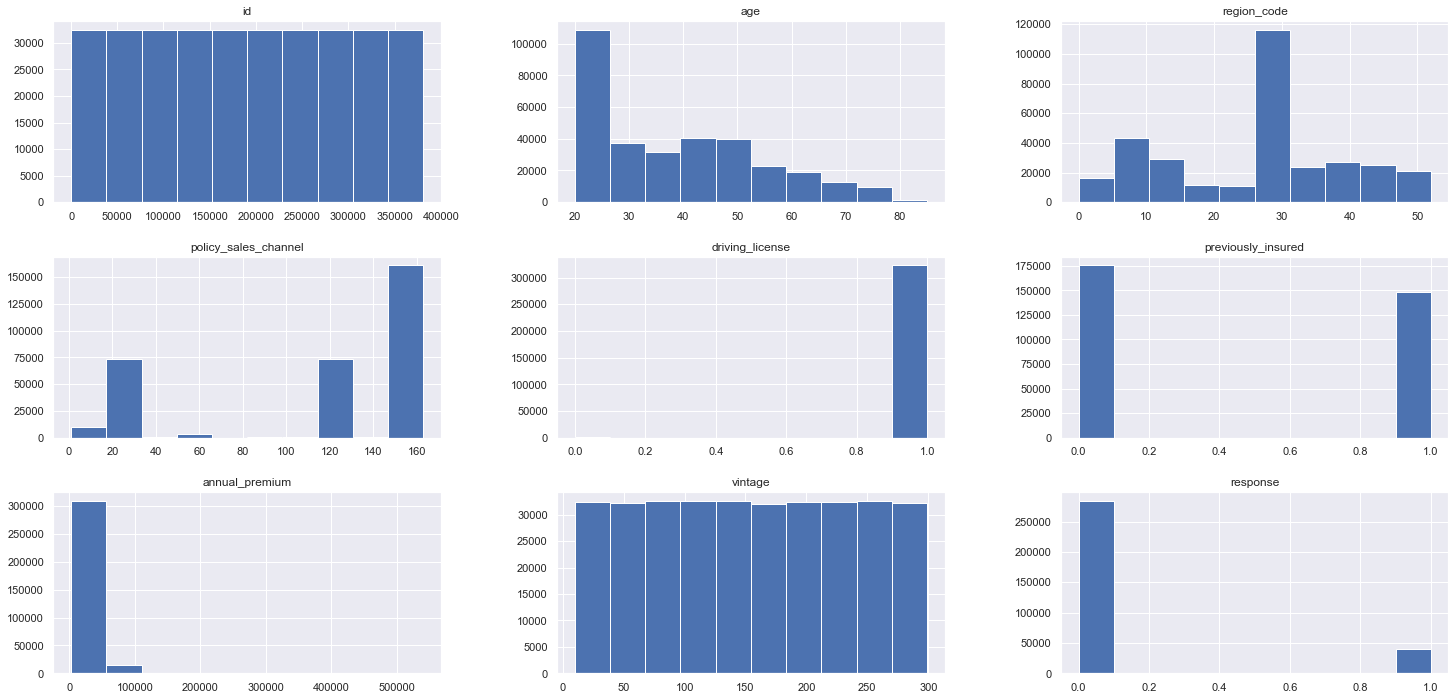

In [23]:
num_attributes.hist();

### 1.6.2 Categorical Attributes

In [24]:
cat_attributes.describe()

,gender,vehicle_age,vehicle_damage
count,323942,323942,323942
unique,2,3,2
top,Male,1-2 Year,Yes
freq,175248,170302,163516


# 2.0 Feature Engineering